# Predicting Heart Disease using Machine Learning

This notebook looks into various data science and machine learning libraries in an attempt to build machine learning model capabale of predicting whether someone has heart diesease or not based on the medical attirbutes

Below are the approach we will take :
    
* Problem Defination
* Data
* Evaluation
* Features
* Modelling
* Experimentation

## Problem defination

Given the clinical parameters can we predict whether the individual have heart diesease or not.

## Data

The original data came from Cleveland data set of UCL Machien learning repo, it can be found in Kaggle as well

https://www.kaggle.com/code/abdmental01/heart-disease-prediction-binary-classification

## Evaluation

If we can reach 95% accuracy on predicting whether the patient has heart diesease then we will be good at continuing this project

## Features 

This is where all the featues of the data will be present

** Craete a data dictionary ** 

| Variable | Description 
|:-------|:--------:|
| age    | Age of the patient in years   | 
| sex    | Gender of the patient (1 = male, 0 = female)  | 
| cp   | Chest pain type: 0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic  | 
| trestbps   | Resting blood pressure in mm Hg  | 
| chol    | Serum cholesterol in mg/dl  | 
| fbs   | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false)  | 
| restecg   | Resting electrocardiographic results: 0: Normal, 1: Having ST-T wave abnormality, 2: Showing probable or definite left ventricular hypertrophy  | 
| thalach   | Maximum heart rate achieved during a stress test | 
| exang   | Exercise-induced angina (1 = yes, 0 = no)  | 
| oldpeak    | ST depression induced by exercise relative to rest  | 
| slope   | Slope of the peak exercise ST segment: 0: Upsloping, 1: Flat, 2: Downsloping  | 
| ca    | Number of major vessels (0-4) colored by fluoroscopy  | 
| thal    | Thalium stress test result: 0: Normal, 1: Fixed defect, 2: Reversible defect, 3: Not described  | 
| target    | Heart disease status (0 = no disease, 1 = presence of disease)  | 


In [47]:
# Preparing the tools

# We are going to use Pandas, Matplotlib and Numpy for data anlysis and manipulation

#Regular EDA (Exploratory Data Analysis) and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Import sklearn models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# For Model evaluation we will use

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, RocCurveDisplay


# Data Exploration ( Exploratory data analysis or EDA)

The goal here is to learn more about the data and coerce the dataset as much as we can

In [48]:
df = pd.read_csv("heart-disease (1).csv")

In [49]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [50]:
df.shape

(303, 14)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [52]:
df["target"].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

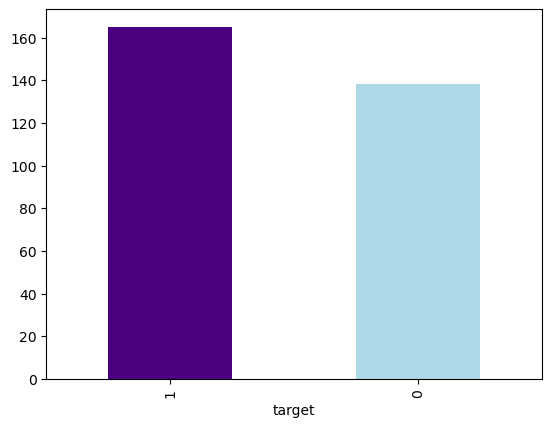

In [53]:
df["target"].value_counts().plot(kind = "bar", color = ["Indigo", "LightBlue"]);

In [54]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [55]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [56]:
### Compare target column with sex column

pd.crosstab(df.sex,df.target)

target,0,1
sex,,
0,24,72
1,114,93


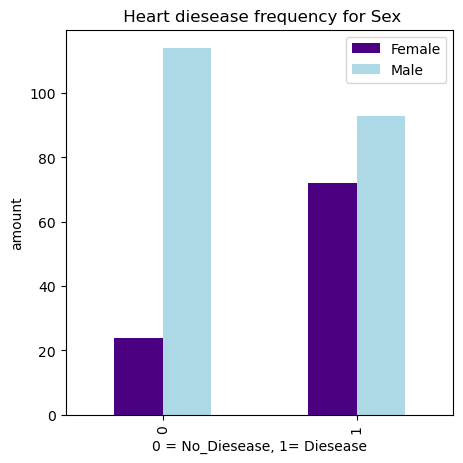

In [57]:
# Create a plot out of crosstab

pd.crosstab(df.target,df.sex).plot(kind="bar", figsize=(5,5), color = ["Indigo", "LightBlue"]);
plt.xlabel("0 = No_Diesease, 1= Diesease" )
plt.ylabel("amount")
plt.legend(["Female", "Male"])
plt.title(" Heart diesease frequency for Sex");

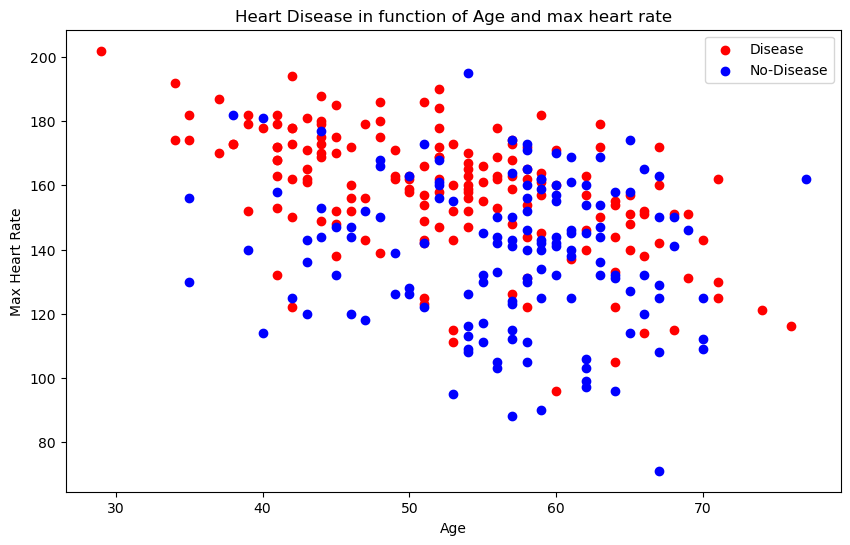

In [58]:
#Create another figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], color="Red");


#Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0], color="Blue");

plt.title("Heart Disease in function of Age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No-Disease"])

## Heart disease frequency per chest pain type

Chest pain type: 

    0: Typical angina, 
    
        1: Atypical angina, 
        
            2: Non-anginal pain, 
            
                3: Asymptomatic
                

In [59]:
pd.crosstab(df.cp, df.target)


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


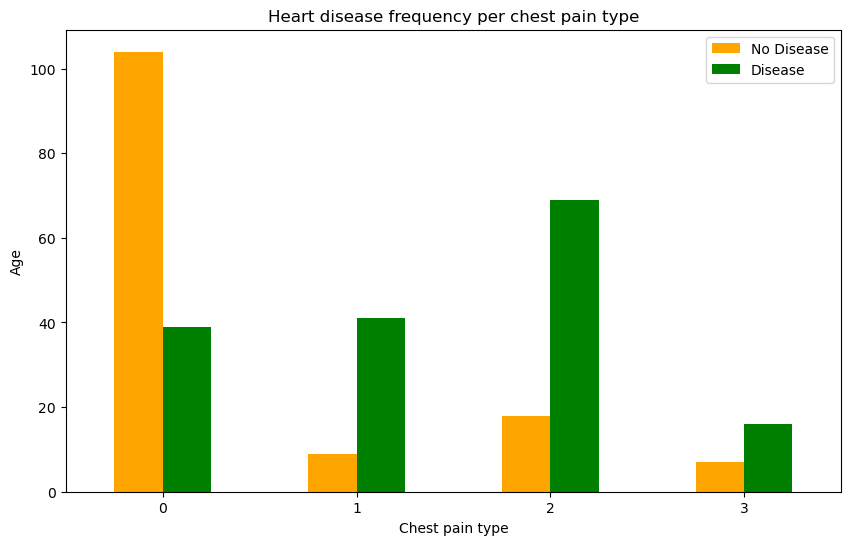

In [86]:
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10,6), color=["Orange", "Green"])
plt.title("Heart disease frequency per chest pain type")
plt.xlabel("Chest pain type")
plt.ylabel("Age")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);


In [61]:
# make a co-relation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


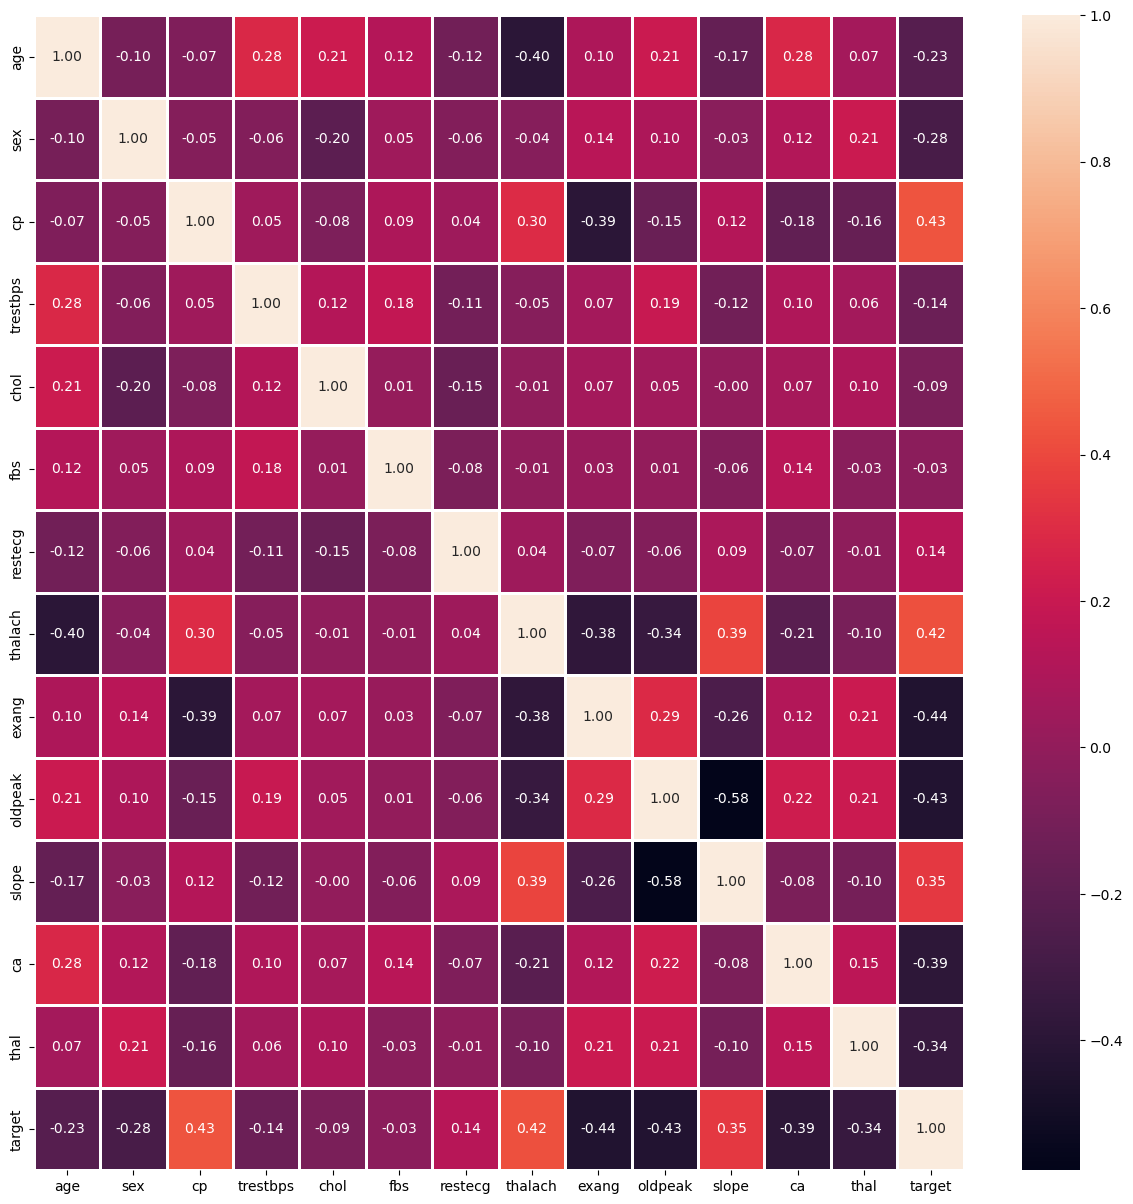

In [63]:
corr_matrix = df.corr()
fig, ax =plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=1, fmt=".2f",cmap=None);

# Modelling

In [64]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
# split the data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [66]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [67]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [68]:
# Split the data into train and test set
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


### Now we have got our data split into train and test split, and now we will build a machine learning model.

We will train it on the training set

We will test it into test set

We are going to use 3 different machine learning models:

* Logistic Regression
* K-nearest Neighbours Classifier
* Random Forest Classifier

In [74]:
# Put the models in the dictionary

models= {"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Classifier" : RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fit and evaluates givenmachine learning models
    models: a dict of diff Sci-kit learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train: training labels
    y_test : testing labels
    """
    
    np.random.seed(42)
    #make a dict to keep the model scores
    model_scores = {}
    # Loop through the models
    for name, model in models.items():
        #fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and append its scores to the model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [87]:
model_scores = fit_and_score(models=models, 
                            X_train=X_train,
                            X_test = X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

C:\Users\Subham Dutta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Classifier': 0.8360655737704918}

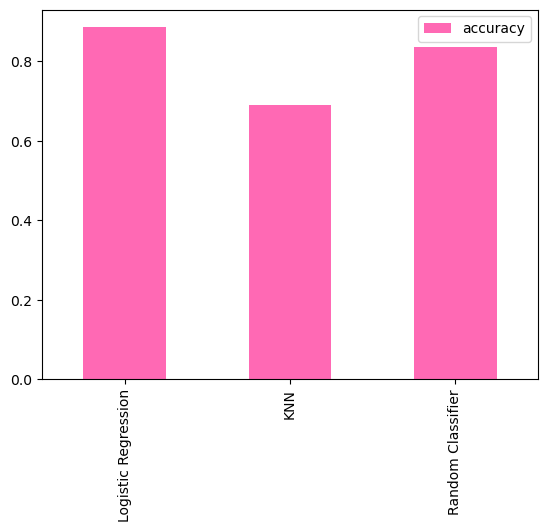

In [88]:
# Model Comparision

model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(color = "HotPink");